In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from read_file import *
from indicators import *
import os

## Première procédure de résolution
### Phase I

In [4]:
## Loading data
n = 200
p = 6
filename = f"./data/2KP200-TA-0.dat"

w=np.zeros(n,dtype=int) # poids des objets
v=np.zeros((n,p),dtype=int) # utilités des objets
W = readFile(filename,w,v)

# ====== On prend un sous-ensemble du problème ====
n = 50
p = 3
w = w[:n]
v = v[:n,:p]
W = w.sum()//2
print(w.shape, v.shape, W)

(50,) (50, 3) 13299


In [29]:
## Phase I: generate non-dominated solution with PLS
params = (n,p,v,w,W)
m = 20
verbose = True
NBMAX = 20

YND = PLS(m,params,NBMAX,verbose= False)
points = list(map(lambda x: x[1], YND))
points = np.array(points)
print(f'nombre de points non-dominés trouvés: {len(points)}')

nombre de points non-dominés trouvés: 272


In [2]:
# On sauvegarde les points dans l'espace des critères
file_output = './sol/I2dim.sol'
if not os.path.isfile(file_output):
    np.savetxt(file_output, points)
points = np.loadtxt(file_output)
points = points.astype(int)
YND = [(None,p) for p in points]
points.shape

(272, 3)

### Phase II: 

In [3]:
# On génère les paramètres du décideur
mode = 'Choquet'
p = points.shape[1]
DM = DecisionMaker(p, mode)

# Solution optimale pour le décideur
scores = [DM.value(y) for y in YND]
opt = points[np.argmax(scores)]
opt

array([20260, 19926, 18312])

In [ ]:
eps = 1e-4
model = Model(dim=p, mode=mode)

o1, o2, regret = model.CSS(YND)
minmax_regrets = [regret]

print(f'Start | {regret =: .2f}')
print(o1[1], o2[1])
iteration = 1
while regret > eps:
    if DM.ask(o1, o2): model.update(o1,o2)
    else: model.update(o2,o1)
    o1, o2, regret = model.CSS(YND)
    minmax_regrets.append(regret)
    print(f'{iteration = } | {regret =: .2f}')
    print(o1[1], o2[1])
    iteration += 1

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-03
Init Choquet Model
Start | regret = 0.31
[20507 19325 17899] [18773 20937 16314]
iteration = 1 | regret = 0.28
[20688 18746 18038] [20165 20241 16361]
iteration = 2 | regret = 0.26
[20663 18524 18138] [21989 17434 14928]
iteration = 3 | regret = 0.16
[19736 18878 18717] [20929 19710 17630]
iteration = 4 | regret = 0.10
[20929 19710 17630] [18411 20722 17940]


Text(0, 0.5, 'minimax regret')

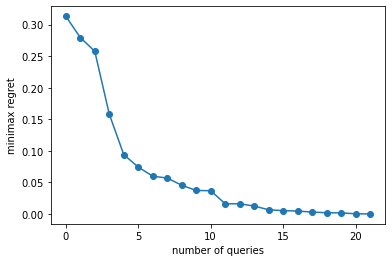

In [5]:
plt.plot(minmax_regrets, 'o-')
plt.xlabel('number of queries')
plt.ylabel('minimax regret')